# Integration Project #1

# Table of contents

1. [Project Description](#ProjectDescription)
2. [Step 1: Open data and general information](#OpenData&GeneralInfo)
3.   [* Step 1: Conclusion](#GeneranlInfoConclusion)
4. [Step 2: Prepare the Data](#PrepareData)
5. [* To Do List](#Step2ToDoList)
6.  [* Step 2: Conclusion](#Step2Conclusion)
7. [Step 3: Analyze the data](#AnalyzeData)
8. [* To Do List](#Step3ToDoList)
9.  [* Step 3: Conclusion](#Step3Conclusion)
10. [Step 4: Create User Profile for each region](#Step4UserProfile)
11. [* To Do List](#Step4ToDoList)
12.  [* Step 4: Conclusion](#Step4Conclusion)
13. [Step 5: Test the following hypotheses](#Step5Hypotheses)
14. [Step 6: Write a general conclusion](#GeneralConclusion)

### Project Description. <a name="ProjectDescription"></a>

|  Name  |  Description  |
| :----: |  :---- |
|  **Initial conditions**  | You work for the online store Ice, which sells video games all over the world. User and expert reviews, genres, platforms (e.g. Xbox or PlayStation), and historical data on game sales are available from open sources.  |
|  **Main question of project**  |  What patterns will show that the game will be successful?|
| **Project Description**  | [Link to Project Description](https://practicum.yandex.com/learn/data-scientist/courses/c1a0fd14-8873-4755-8885-68fd987bf001/sprints/4250/topics/96ff1466-eef1-46cf-9e43-33b1632b3b5a/lessons/6ac0f71f-9759-4e3d-bcc7-e59143954858/)    |
| **Datasets**             | [/datasets/games.csv](https://code.s3.yandex.net/datasets/games.csv)  |

### Step 1. Open the data file and study the general information. <a name="OpenData&GeneralInfo"></a>

In [1]:
# import all packages
import pandas as pd
import numpy as np
import random
from scipy import stats as st

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

%matplotlib inline

In [2]:
# connect all datasets:
df_games = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

In [3]:
# function to determine if columns in file have null values:
def get_percent_of_na(df, num):
    count = 0; # first reset counter.
    df = df.copy() # copy dataframe in new structure.
    amount = (df.isna().sum() / df.shape[0])
    
    for column, percent in zip(amount.index, amount.values):
        num_of_nulls = df[column].isna().sum()
        if num_of_nulls == 0:
            continue
        else:
            count += 1
        print('Column {} has {:.{}%} percent of Nulls, and {} of nulls'.format(column, percent, num, num_of_nulls))
        
    if count != 0:
        print('\033[1m' + 'There are {} columns with NA.'.format(count) + '\033[0m')
    else: 
        print()
        print('\033[1m' + 'There are no columns with NA.' + '\033[0m')

In [4]:
def get_percent_of_na_table(df, num):
    df_nulls = pd.DataFrame(df.isna().sum(), columns=['Missing Values'])
    df_nulls['Percent of Nulls'] = round(df_nulls['Missing Values'] / df.shape[0], num) * 100
    return df_nulls

In [5]:
# function to display helpfull information about each file.
def get_info(df):
    print('Head:')
    display(df.head())
    print('-'*110)
    
    print('Info:')
    display(df.info())
    print('-'*110)
    
    print('Describe:')
    display(df.describe())
    display(df.describe(include='object'))
    print('-'*110)
    
    #print('Columns with nulls:')
    #get_percent_of_na(df_games, 2)
    #print('-'*110)
    
    print('Percent of columns with nulls:')
    display(get_percent_of_na_table(df_games, 2))
    print('-'*110)
    
    print('Shape:')
    print(df.shape)
    print('-'*110)
    
    print('Duplicated:')
    print('\033[1m' + 'We have {} duplicated rows. \n'.format(df.duplicated().sum()) + '\033[0m')
    print('/'*110)

In [6]:
# let's use get_info function for check information for all datasets:
get_info(df_games)

Head:


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


--------------------------------------------------------------------------------------------------------------
Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

--------------------------------------------------------------------------------------------------------------
Describe:


,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


,Name,Platform,Genre,User_Score,Rating
count,16713,16715,16713,10014,9949
unique,11559,31,12,96,8
top,Need for Speed: Most Wanted,PS2,Action,tbd,E
freq,12,2161,3369,2424,3990


--------------------------------------------------------------------------------------------------------------
Percent of columns with nulls:


,Missing Values,Percent of Nulls
Name,2,0.0
Platform,0,0.0
Year_of_Release,269,2.0
Genre,2,0.0
NA_sales,0,0.0
EU_sales,0,0.0
JP_sales,0,0.0
Other_sales,0,0.0
Critic_Score,8578,51.0
User_Score,6701,40.0


--------------------------------------------------------------------------------------------------------------
Shape:
(16715, 11)
--------------------------------------------------------------------------------------------------------------
Duplicated:
We have 0 duplicated rows. 

//////////////////////////////////////////////////////////////////////////////////////////////////////////////


#### Step1: Conclusion <a name="GeneranlInfoConclusion"></a>

Based on the above information: 
> * A very large percentage of missing values in a column "Critic_Score" - 51%. More than half of the data is missing.
* Columns "User_Score" and "Raiting" also have approximately the same percentage of missing data: 40%. 
* We can calculate the average for a column "Critic_Score" because the values in that column are of type real to fill in the missing values.
* Columns "User_Score" and "Rating" are of type object. 

### Step 2. Prepare the data <a name="PrepareData"></a>

In [7]:
def lowercase_convert(df):
    return df.rename(str.lower, axis='columns')
df_games = lowercase_convert(df_games)
print(df_games.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


In [8]:
# check again columns data type.
df_games.info()
df_games.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


* Column "year_of_release" should be an integer, currently it is a float.
* Column "user_score" should be a float, currently it is a object.

Before need to put attention, to this point:
- Pay attention to the abbreviation TBD (to be determined). Specify how you intend to handle such cases.

In [9]:
# replase all "tbd" values by na in column "user_score".
df_games['user_score'].replace(['tbd'], np.nan, inplace=True)

In [10]:
# describe type convertation function
def convert_to_type(df, columns, type_val):
    for col in columns:
        df[col] = df[col].astype(type_val)
        
# and fill nan by mean values function.
def fill_nan(df, columns):
    for col in columns:
        df[col] = df[col].fillna(df[col].mean())

In [11]:
# use this functions:
# first convert "user_score" column -> float type.
convert_to_type(df_games, ['user_score'], float)
# fill missing values of "critic_score" and "user_score" by mean values.
fill_nan(df_games,['critic_score','user_score'])
df_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.000000,8.000000,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,68.967679,7.125046,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.000000,8.300000,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.000000,8.000000,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,68.967679,7.125046,NaN


In [12]:
# fill missing values of 'year_of_release' column by median values.
df_games['rating'].fillna('NA', inplace=True)
df_games['year_of_release'].fillna(df_games['year_of_release'].median(), inplace=True)

In [13]:
# convert other types.
convert_to_type(df_games, ['name','platform','genre','rating'], str)
convert_to_type(df_games, ['year_of_release'], int)
convert_to_type(df_games, ['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score'], float)
# check types of data again
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16715 non-null object
platform           16715 non-null object
year_of_release    16715 non-null int64
genre              16715 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       16715 non-null float64
user_score         16715 non-null float64
rating             16715 non-null object
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [14]:
# now replace all missing values by value "Not Avaiable" in column 'rating'
df_games['rating'] = df_games['rating'].replace(['NA'], np.nan)
# let's create merge dictionary "genre-rating":
dict_genre_rating = df_games.groupby('genre')['rating'].agg(pd.Series.mode).to_dict()
print(dict_genre_rating)

{'Action': 'T', 'Adventure': 'E', 'Fighting': 'T', 'Misc': 'E', 'Platform': 'E', 'Puzzle': 'E', 'Racing': 'E', 'Role-Playing': 'T', 'Shooter': 'M', 'Simulation': 'E', 'Sports': 'E', 'Strategy': 'T', 'nan': array([], dtype=object)}


In [15]:
df_games['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [16]:
df_games['rating'].value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: rating, dtype: int64

In [17]:
#write function for fill missing values in column "rating"
def fill_rating(row):
    if row['rating'] is np.nan or row['rating'] == '[]':
        return dict_genre_rating[row['genre']]
    else:
        return row['rating']
    
df_games['rating'] = df_games.apply(fill_rating, axis=1)
df_games['rating'].value_counts()

E       7793
T       5618
M       1867
E10+    1420
EC         8
K-A        3
RP         3
[]         2
AO         1
Name: rating, dtype: int64

In [18]:
# let's check again missing values.
df_games.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

all missing values filled. 

In [19]:
df_games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [20]:
df_games['total_sales'] = df_games[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)
df_games['total_sales'].head()

0    82.54
1    40.24
2    35.52
3    32.77
4    31.38
Name: total_sales, dtype: float64

#### Step 2: Conclusion <a name="Step2Conclusion"></a>

**In step 2 it was implemented:**
> * Column names have been changed to lowercase.
* Corresponding data types for some columns have been changed. Data type of column **"user_score"** changed to float. Prior to this, this column was of type object, although it included only numeric values. Column **"year_of release"** was changed to integer type from float. The real type is redundant for the values of this column.
* Missing values have been filled, for column "year_of_release" - by median values. I was guided to take the most recurring year. For columns **'critic_score','user_score'** - the missing values have been filled in with the mean value.
* In columns **'critic_score', 'user_score'** may have missing values as the columns are populated by critics and viewers. In all of them, they can be omitted because users did not provide values.
* I decided to replace the abbreviation TBD (to be determined) - by nan values.
* Created new column **'total_sales'** based on columns **na_sales, eu_sales, jp_sales, other_sales**. 

### Step 3. Analyze the data <a name="AnalyzeData"></a>

In [21]:
# for check how many games were released in different years, we can group by years_of_release and count this values. 
display(df_games.groupby('year_of_release')['name'].agg('count'))

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      62
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1466
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64

In [22]:
# let's render this data.
def render_data_plot(df, column):
    bins     = np.arange(df[column].min(),df[column].max()+1,3)
    bar_plot = df.groupby(pd.cut(df[column], bins=bins)).agg({column:'count'})
    ax       = bar_plot.plot(kind='bar', rot=45, figsize=(16,5), legend=False)
    for i, value in enumerate(bar_plot.iloc[:,0].values):
        ax.text(i + 0.25, value + 3, str(value), color='blue', fontweight='bold')
    plt.title('Year of Release')
    plt.xlabel('year of release')
    plt.ylabel('count')
    plt.show()

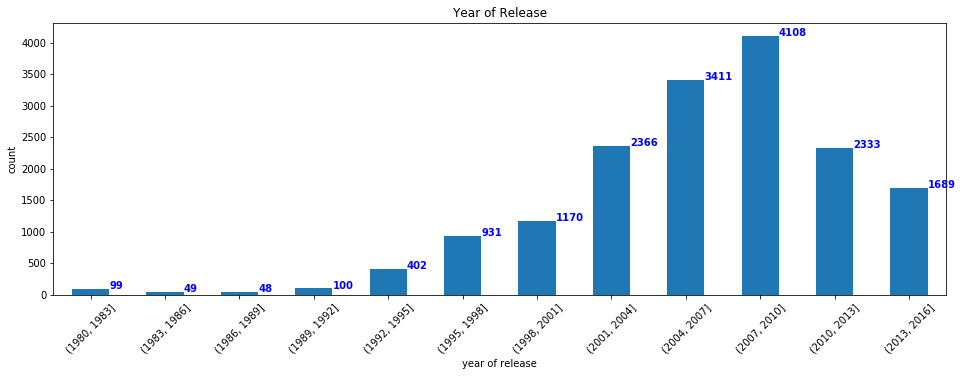

In [23]:
render_data_plot(df_games, 'year_of_release')

Conclusion:
> * According to the graph, we can see that the maximum number of games was released between 2007 and 2010. During this period, 4108 games were released. In subsequent years, the number of games released began to decline, and very sharply, the next four years from 2010 to 2013 showed that 2333 games were released. Which means a reduction in the release of the game by almost 2 times. This almost corresponds to the time span from 2001 to 2004, when the market was growing - 2366 games released.
* If this is a negative trend, then the number of games in subsequent periods of time should not increase.

- [X] Look at how sales varied from platform to platform. Choose the platforms with the greatest total sales and build a distribution based on data for each year. Find platforms that used to be popular but now have zero sales. How long does it generally take for new platforms to appear and old ones to fade?

In [24]:
def render_plot_bar(df, x, y, column='', value='', func=np.sum):
    if column != '' and value != '':
        filter_df      = df[df[column] == value]
        plot_df        = filter_df.pivot_table(index=x, values=y, aggfunc=func)
        values_to_plot = plot_df[y].values
    else:
        plot_df        = df.pivot_table(index=x, values=y, aggfunc=func)
        values_to_plot = plot_df[y].values
        
    title = str(value) + " - " + str(y) + ' vs. ' + x
    ax    = plot_df.plot(kind='bar', figsize=(16,5), rot=45, title=title, legend=False)
    
    for i in ax.patches: 
        ax.annotate(str(round(i.get_height(), 2)), (i.get_x() * 1.005, i.get_height() * 1.05))
    
    plt.ylabel(y)
    plt.show()

In [25]:
sales = df_games.pivot_table(index='platform', values='total_sales', aggfunc=np.sum).sort_values(by='total_sales', ascending=False).head()
display(sales)

,total_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12


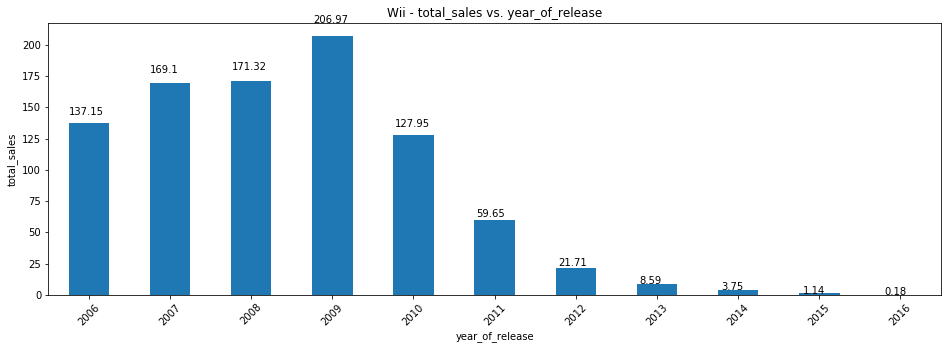

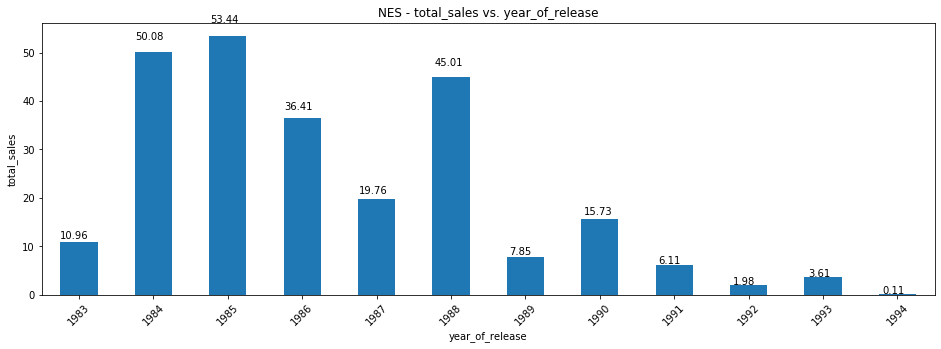

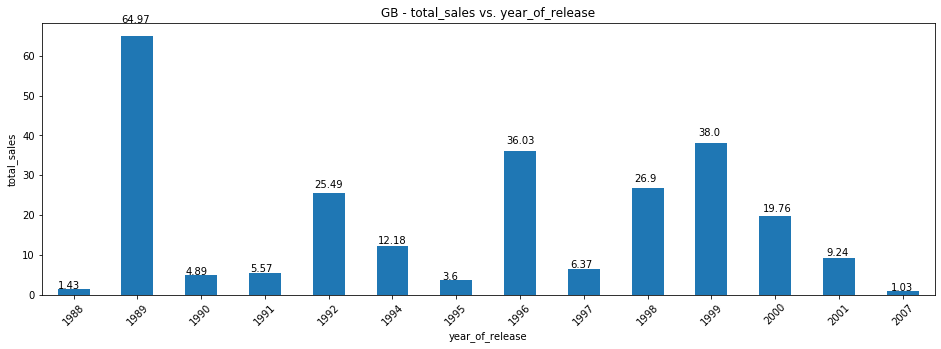

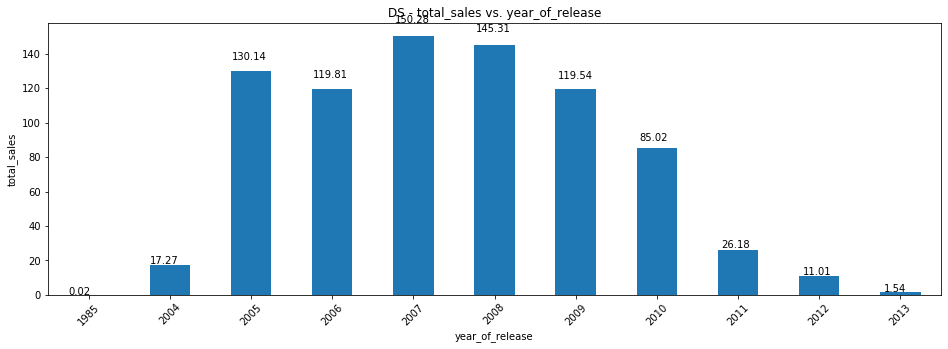

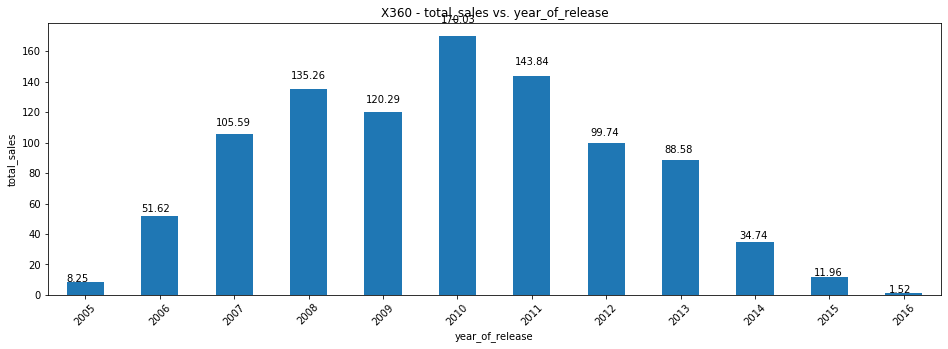

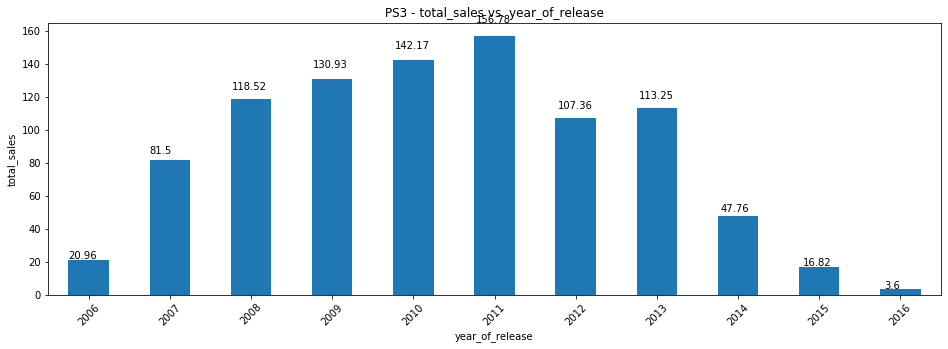

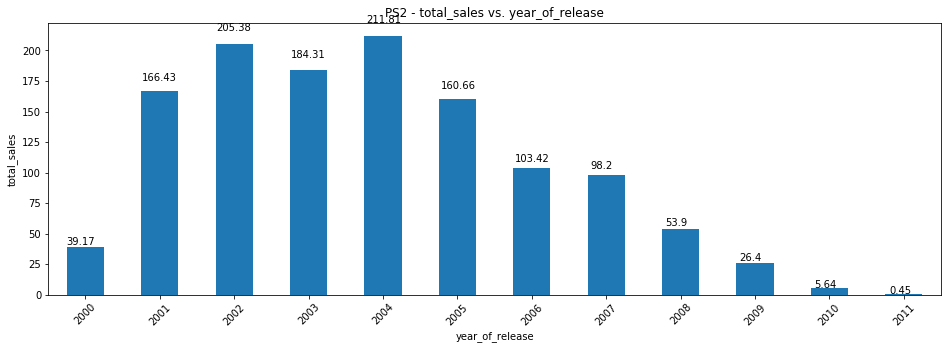

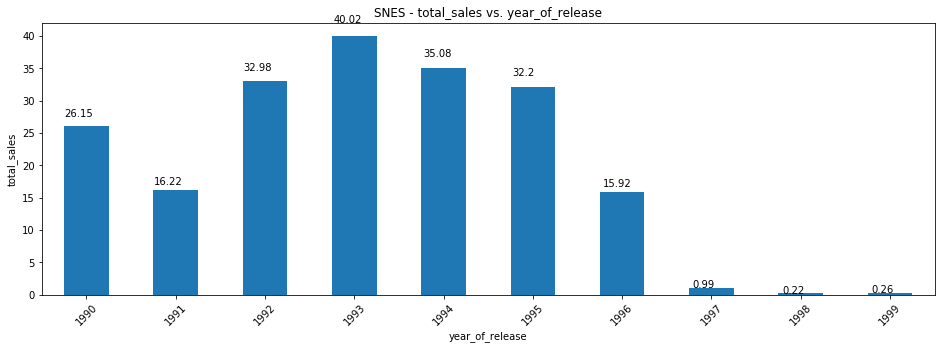

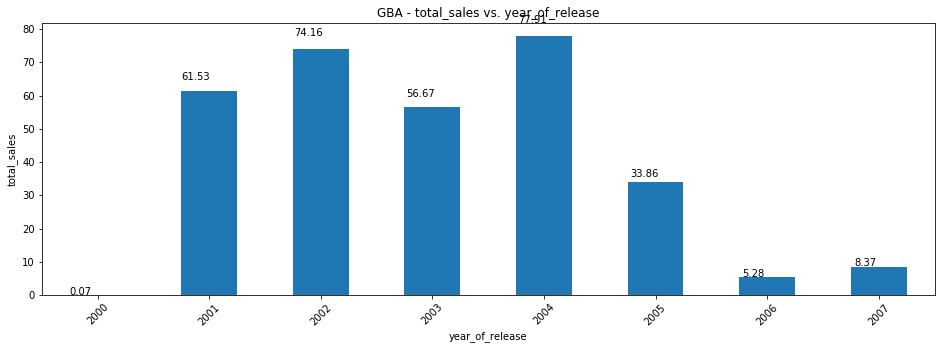

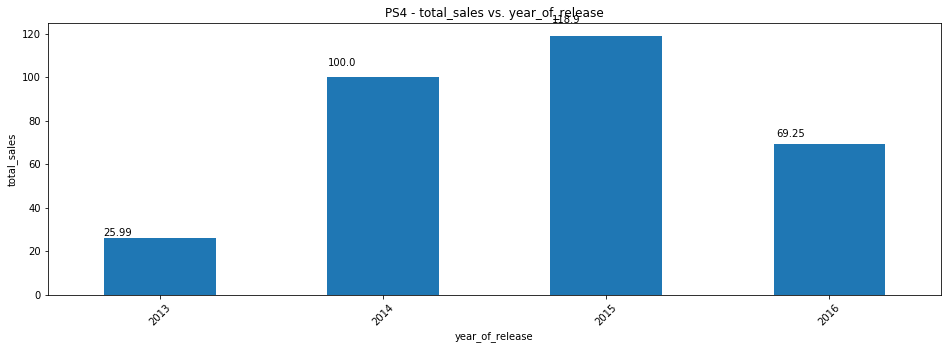

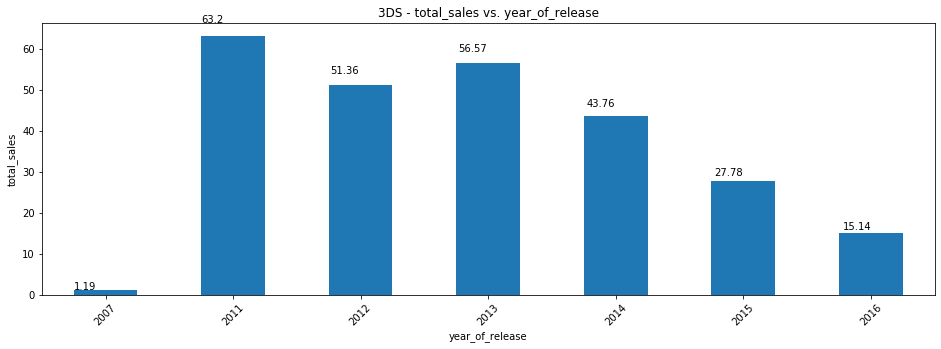

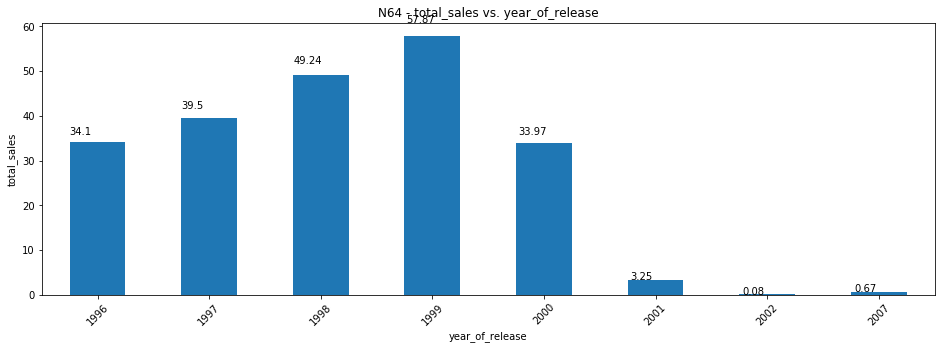

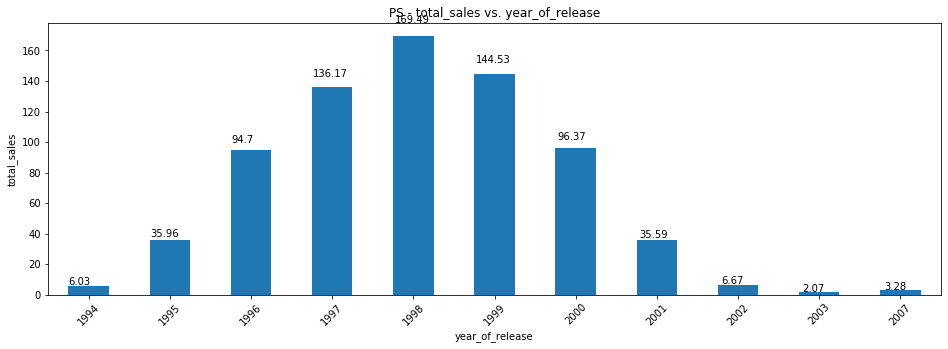

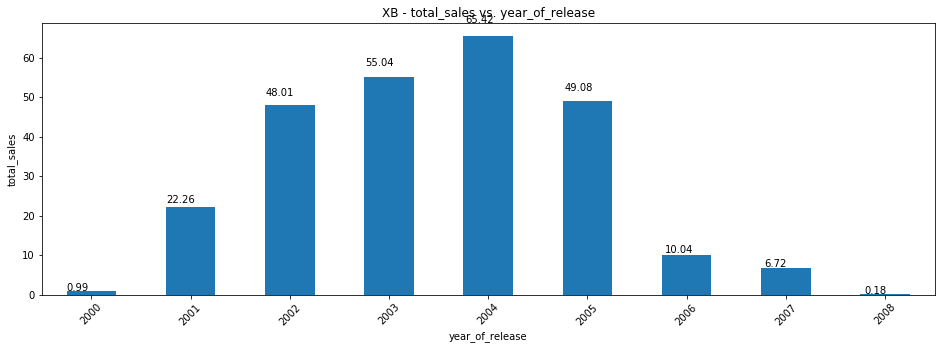

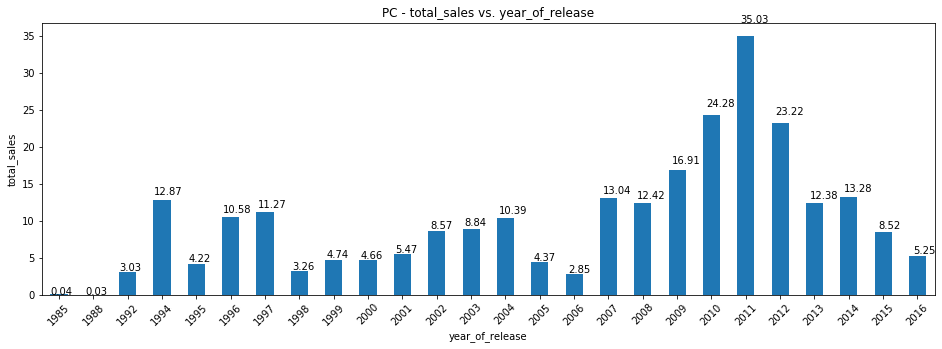

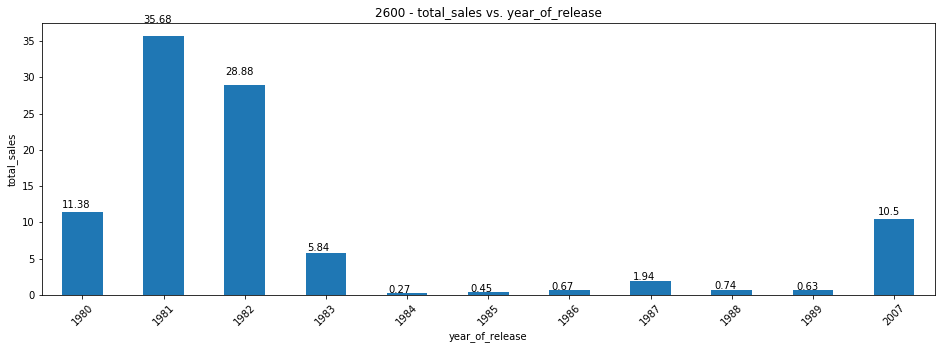

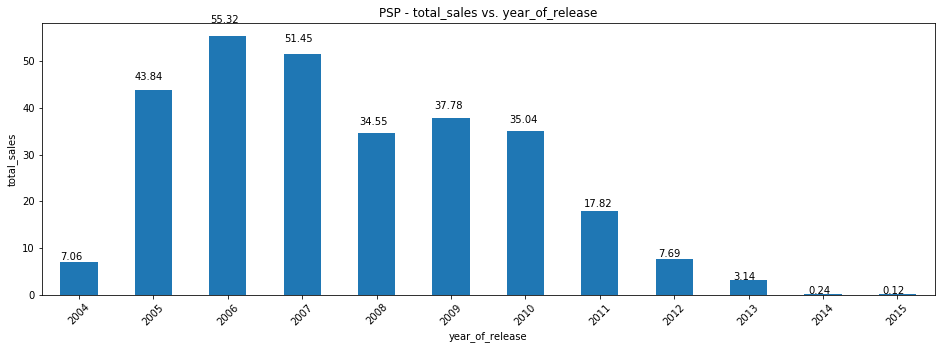

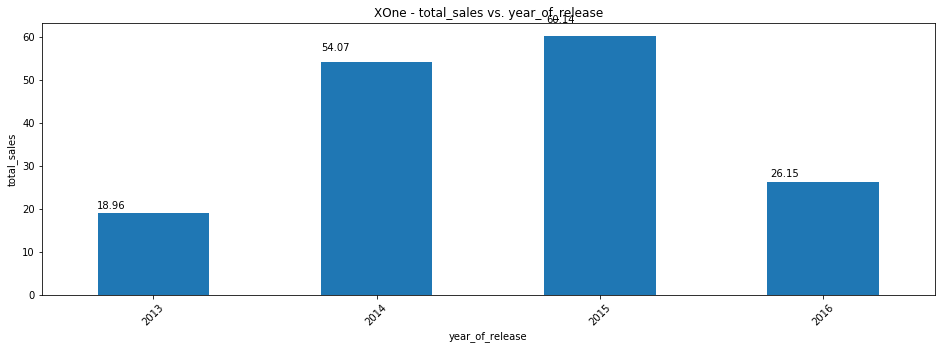

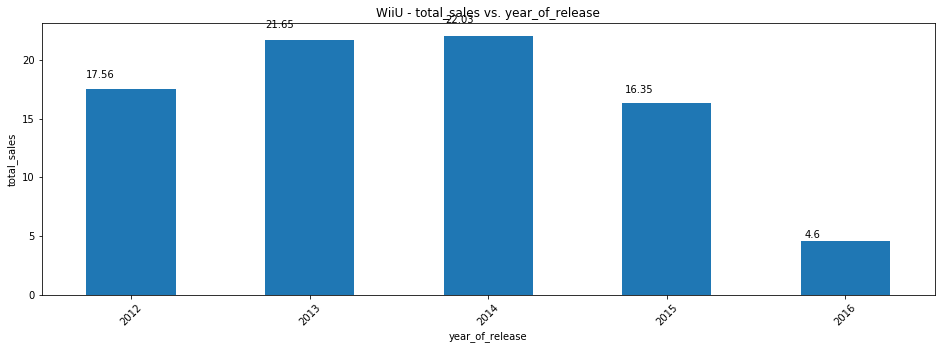

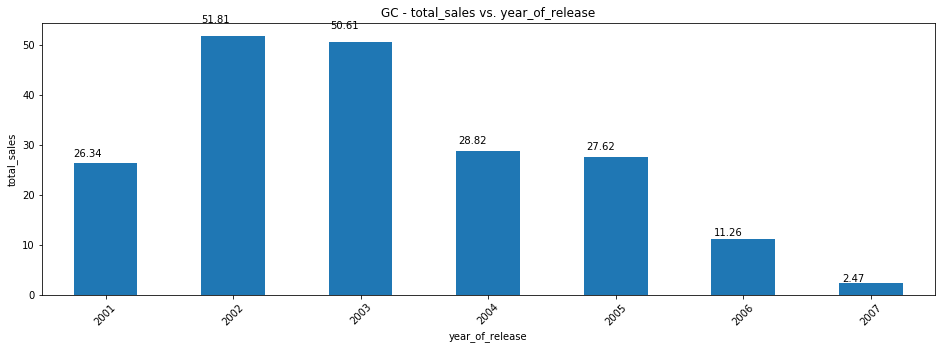

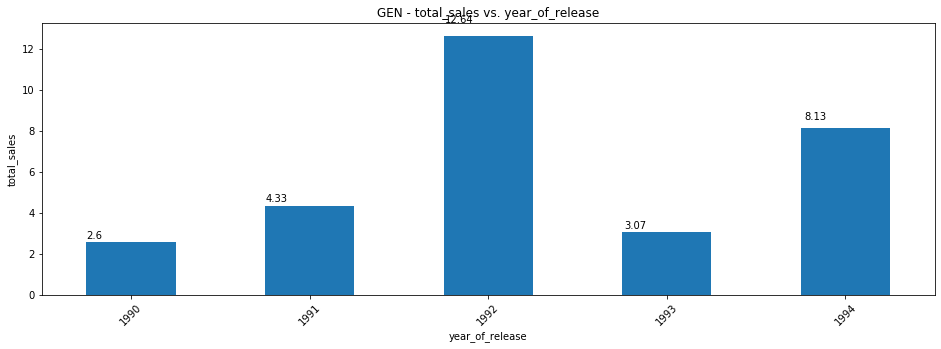

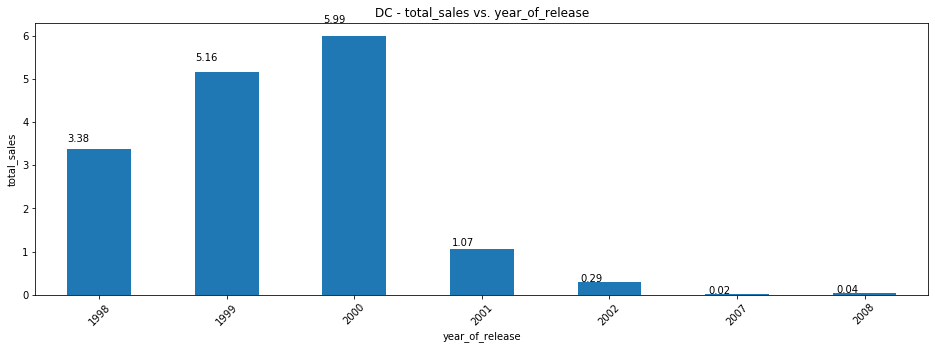

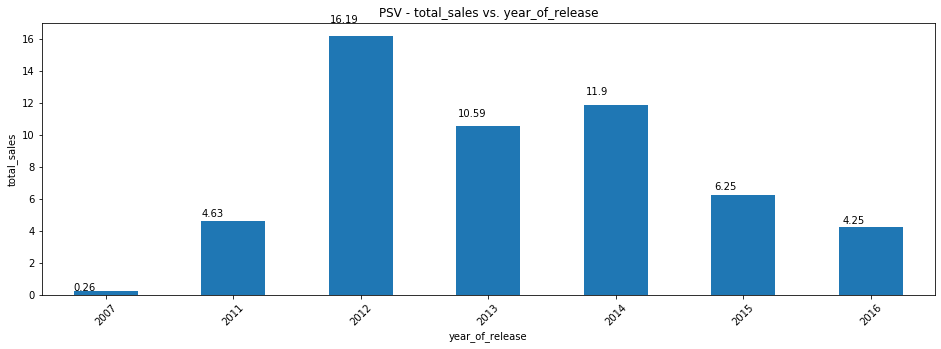

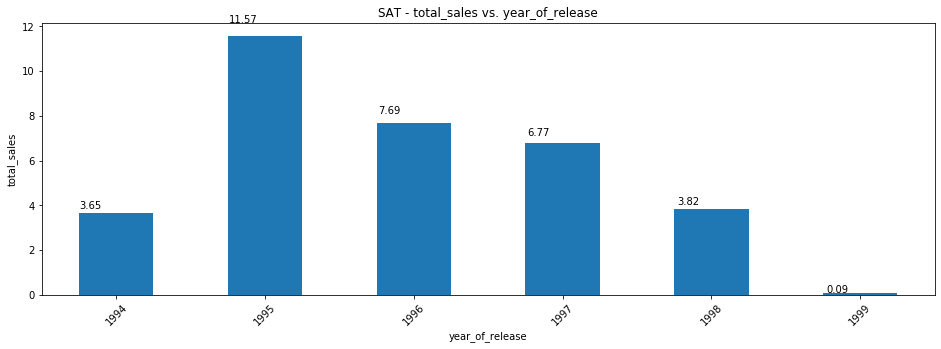

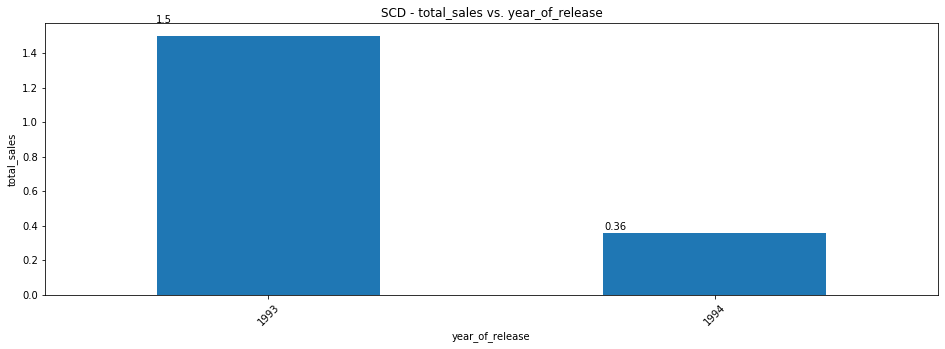

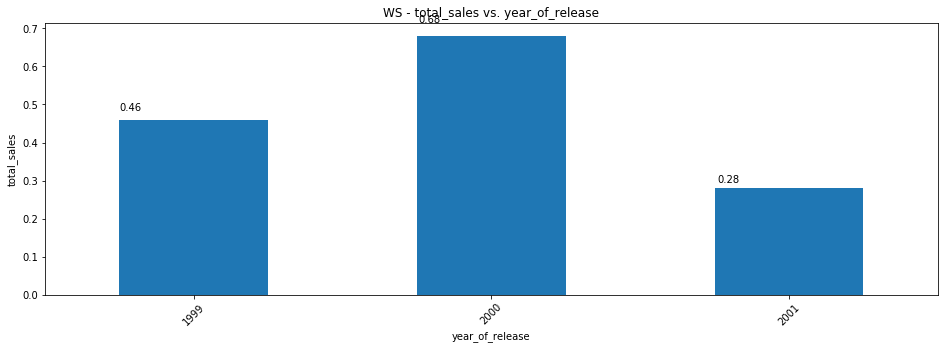

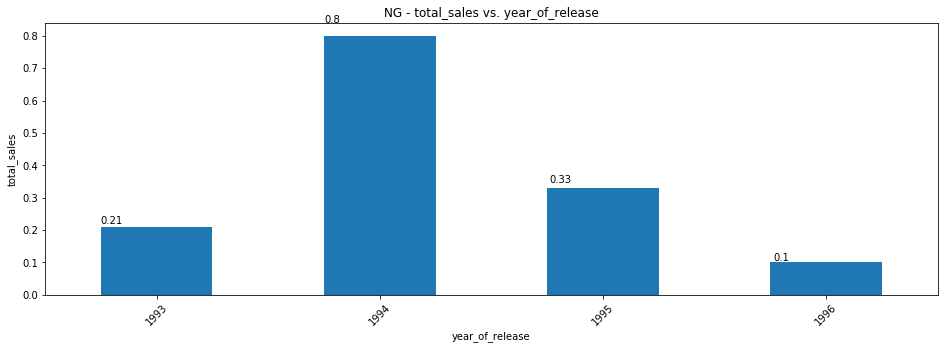

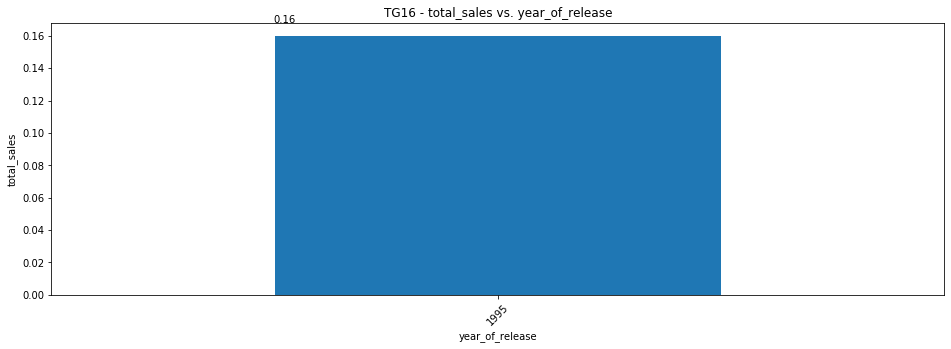

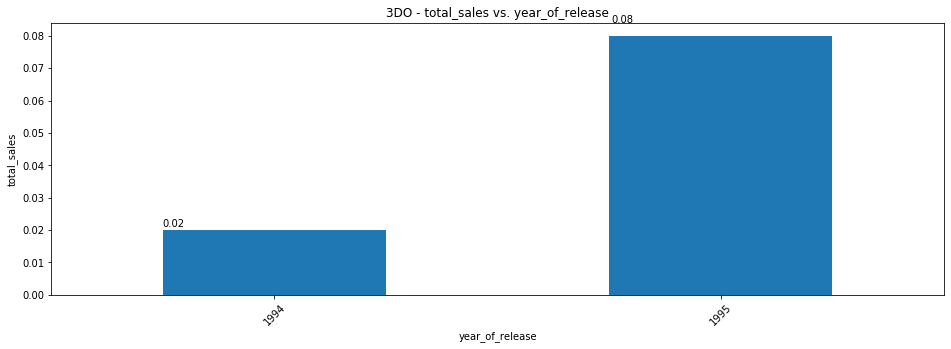

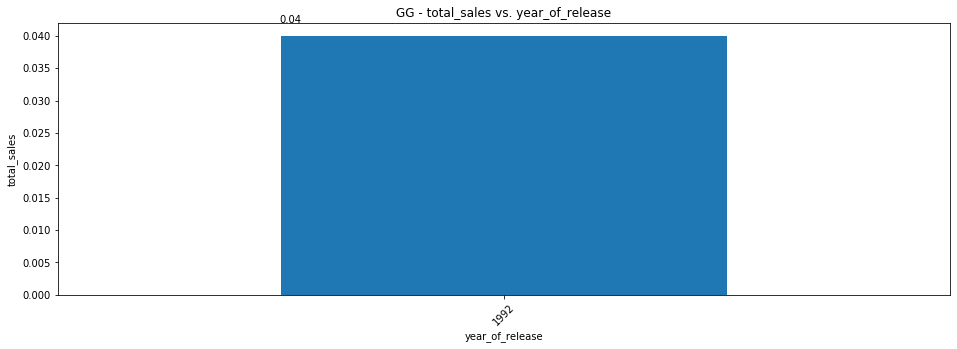

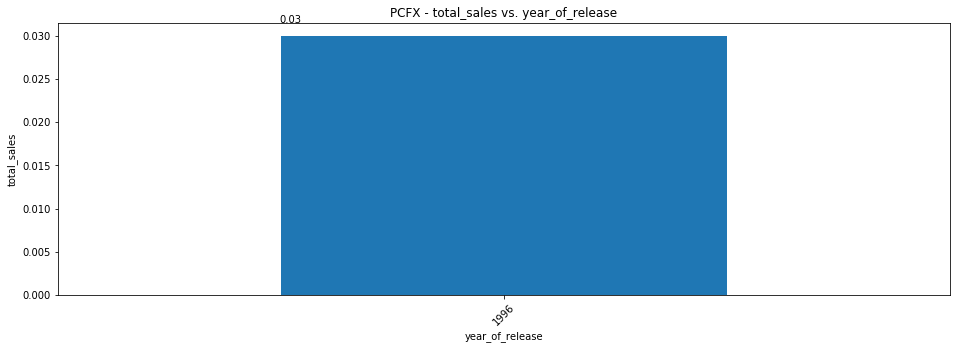

In [26]:
for platform in df_games['platform'].unique():
    render_plot_bar(df_games, 'year_of_release', 'total_sales', 'platform', platform)

Descriptions and conclusion: 
> * The most popular releases per platform are:
     1. PS2 -	\$1255.77
     1. X360 -	\$971.42
     1. PS3	- \$939.65
     1. Wii	- \$907.51
     1. DS	- \$806.12
     
> * After about 1 year, the console will gain popularity. 
* Typical lifespan of concolse is around 4-6 years.
* One of the platforms that has been popular is the NES platform. It was quite popular from 1983 to 1988, but her last year of sales dates back to 1994. Thus, for 2016, it has zero sales now.

In [27]:
df_years_slice = df_games[(df_games['year_of_release'] >= 2014) & (df_games['year_of_release'].notnull())]
df_years_slice.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,68.967679,7.125046,M,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.000000,8.300000,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,68.967679,7.125046,T,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.000000,4.300000,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,68.967679,7.125046,M,7.98


Conclusion:
> * I decided to choose the period from 2006 to 2016, since it was from 2006 that the number of games released per year began to number in the thousands.

In [28]:
df_years_slice.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False).head(6)

,total_sales
platform,
PS4,288.15
XOne,140.36
3DS,86.68
PS3,68.18
X360,48.22
WiiU,42.98


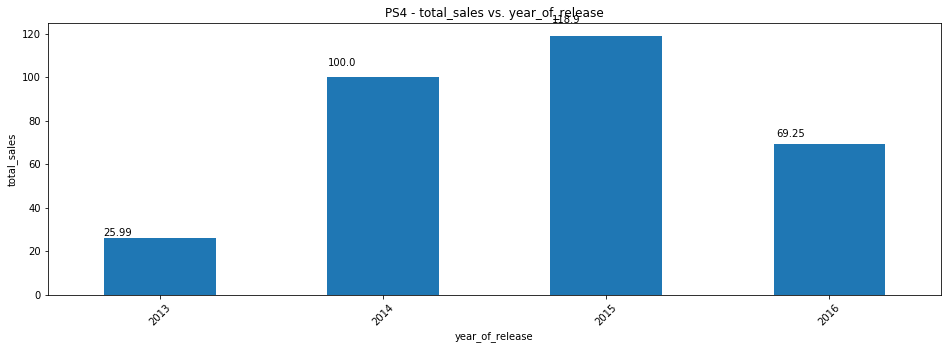

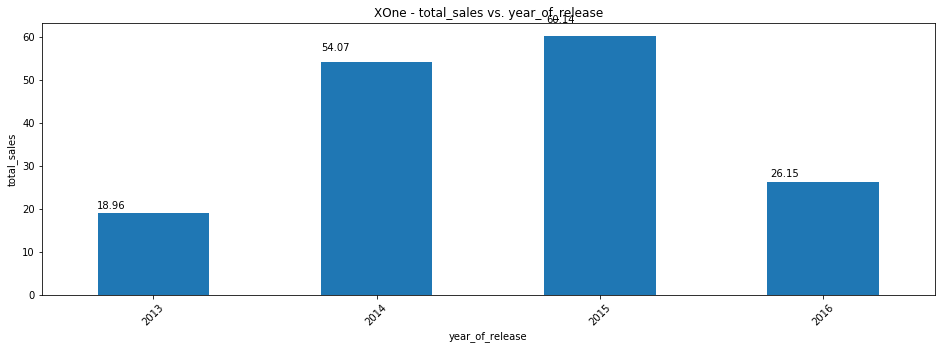

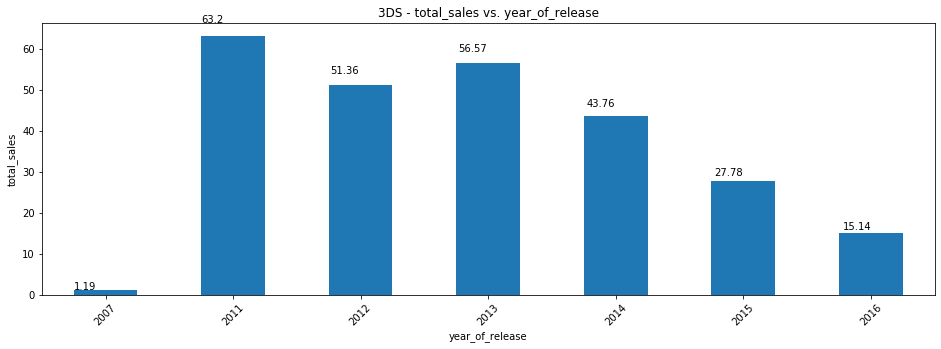

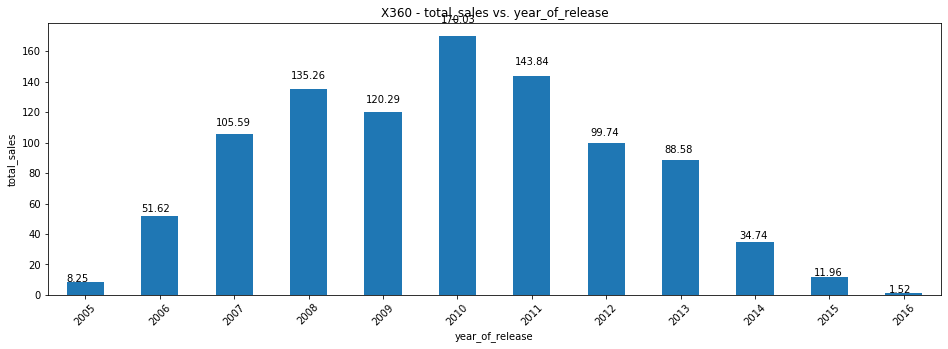

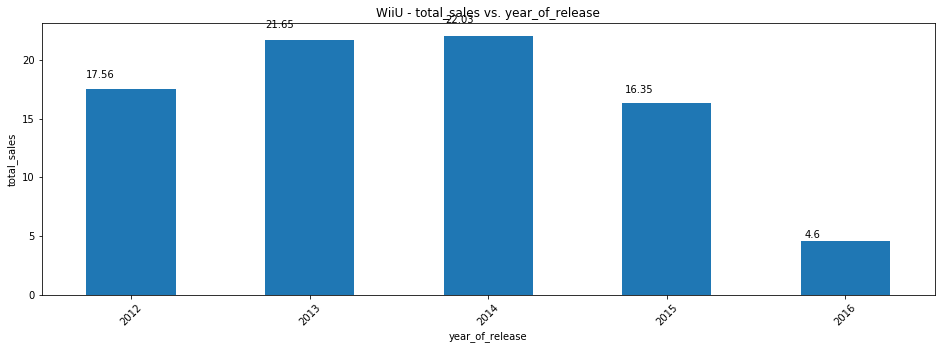

In [29]:
# render this data: 
for platform in ['PS4', 'XOne', '3DS', 'X360', 'WiiU']:
    render_plot_bar(df_games, 'year_of_release','total_sales','platform', platform)

Conclusion:
> * Most profitable console is the PS4, XOne, 3DS, PS3, WiiU and X360, according to current total_sales indicators. 
* At the moment, all platform sales are declining. The largest decrease in comparison with the rest of the X360 platform - 1.52 USD million dollars.
* But according to the typical life span of platforms, I would additionally pay attention to the WiiU platform. At the moment, this platform ranks third among the newest platforms released in 2012-2013. Yielding first and second places only PS4 and XOne, respectively. 

In [30]:
# let's games from most profitable consols: 
df_ps4  = df_games.query('platform == "PS4"')
df_xone = df_games.query('platform == "XOne"')
df_3ds  = df_games.query('platform == "3DS"')
df_wiiu = df_games.query('platform == "WiiU"')

In [31]:
def head_tail(df, column):
    display(df.sort_values(by=column, ascending=False).head())
    print('-' *124)
    display(df.sort_values(by=column, ascending=False).tail())

In [32]:
sns.__version__

'0.9.0'

In [33]:
def plot_den_outl(df, column, title):
    x = df[column]
    
    plt.figure(figsize=(16,5))
    sns.distplot(a=x, kde=True) # stat="density" linewidth=0
    plt.title(title)
    plt.show()

    #plt.figure(figsize=(16,5))
    #sns.boxplot(x=x)
    #plt.title(title)
    #plt.show()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,68.967679,7.125046,M,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.000000,8.300000,M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.000000,4.300000,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,68.967679,7.125046,M,7.98
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.000000,5.700000,M,7.66


----------------------------------------------------------------------------------------------------------------------------


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15943,Professional Farmer 2016,PS4,2015,Action,0.00,0.01,0.0,0.0,68.967679,7.125046,T,0.01
15864,Rocksmith 2014 Edition Remastered,PS4,2016,Misc,0.01,0.00,0.0,0.0,68.967679,7.800000,T,0.01
15839,Mark McMorris Infinite Air,PS4,2016,Sports,0.01,0.00,0.0,0.0,49.000000,6.000000,T,0.01
15790,This War of Mine,PS4,2016,Action,0.00,0.01,0.0,0.0,68.967679,7.125046,T,0.01
16585,Farming 2017 - The Simulation,PS4,2016,Simulation,0.00,0.01,0.0,0.0,68.967679,7.125046,E,0.01


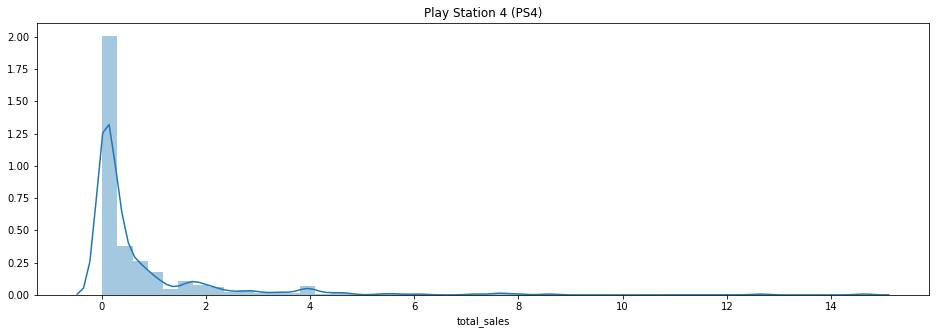

In [34]:
head_tail(df_ps4, 'total_sales')
plot_den_outl(df_ps4, 'total_sales', 'Play Station 4 (PS4)')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,68.967679,7.125046,M,7.39
165,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97.000000,7.900000,M,5.47
179,Call of Duty: Advanced Warfare,XOne,2014,Shooter,3.22,1.55,0.01,0.48,81.000000,5.400000,M,5.26
242,Halo 5: Guardians,XOne,2015,Shooter,2.78,1.27,0.03,0.41,84.000000,6.400000,T,4.49
270,Fallout 4,XOne,2015,Role-Playing,2.51,1.32,0.01,0.38,88.000000,6.200000,M,4.22


----------------------------------------------------------------------------------------------------------------------------


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16066,Assetto Corsa,XOne,2016,Racing,0.00,0.01,0.0,0.0,63.000000,6.700000,E,0.01
16035,Pac-Man Championship Edition 2 + Arcade Game S...,XOne,2016,Action,0.01,0.00,0.0,0.0,68.967679,7.125046,T,0.01
16015,Mark McMorris Infinite Air,XOne,2016,Sports,0.01,0.00,0.0,0.0,68.967679,7.100000,T,0.01
16013,Dead Rising 2,XOne,2016,Action,0.01,0.00,0.0,0.0,68.967679,7.125046,M,0.01
16672,Metal Gear Solid V: The Definitive Experience,XOne,2016,Action,0.01,0.00,0.0,0.0,68.967679,7.125046,M,0.01


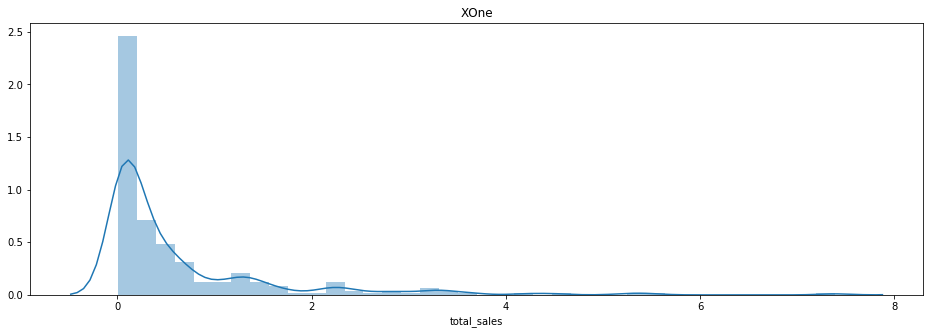

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,68.967679,7.125046,T,14.60
40,Mario Kart 7,3DS,2011,Racing,5.03,4.02,2.69,0.91,85.000000,8.200000,E,12.65
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,68.967679,7.125046,T,11.68
53,Super Mario 3D Land,3DS,2011,Platform,4.89,3.00,2.14,0.78,90.000000,8.400000,E,10.81
62,New Super Mario Bros. 2,3DS,2012,Platform,3.66,3.14,2.47,0.63,78.000000,7.200000,E,9.90


----------------------------------------------------------------------------------------------------------------------------


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16143,Azure Striker Gunvolt,3DS,2016,Action,0.01,0.00,0.00,0.0,77.000000,8.400000,E10+,0.01
16114,Sousaku Alice to Oujisama!,3DS,2015,Simulation,0.00,0.00,0.01,0.0,68.967679,7.125046,E,0.01
16045,Turbo: Super Stunt Squad,3DS,2013,Sports,0.00,0.01,0.00,0.0,68.967679,5.200000,E,0.01
16010,Adventure Time: The Secret of the Nameless,3DS,2014,Adventure,0.01,0.00,0.00,0.0,68.967679,7.125046,E,0.01
16688,Outdoors Unleashed: Africa 3D,3DS,2011,Sports,0.01,0.00,0.00,0.0,68.967679,7.125046,T,0.01


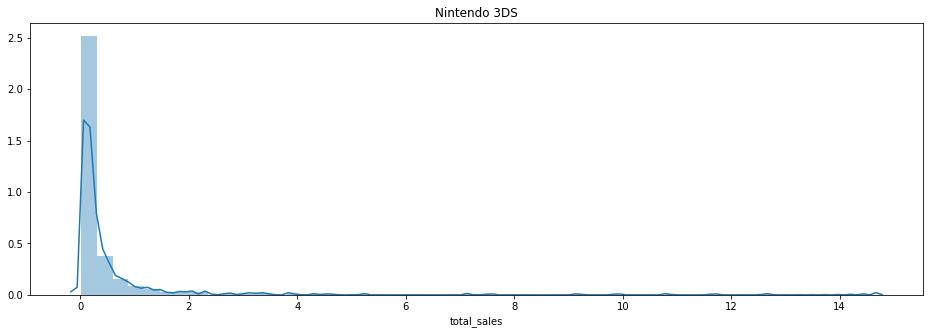

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
110,Mario Kart 8,WiiU,2014,Racing,3.15,2.15,1.28,0.51,88.000000,9.100000,E,7.09
185,New Super Mario Bros. U,WiiU,2012,Platform,2.30,1.34,1.27,0.32,84.000000,8.100000,E,5.23
216,Super Smash Bros. for Wii U and 3DS,WiiU,2014,Fighting,2.60,1.08,0.81,0.38,68.967679,7.125046,T,4.87
247,Splatoon,WiiU,2015,Shooter,1.54,1.18,1.46,0.26,81.000000,8.500000,E10+,4.44
248,Nintendo Land,WiiU,2012,Misc,2.52,1.11,0.46,0.33,77.000000,7.900000,E10+,4.42


----------------------------------------------------------------------------------------------------------------------------


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16376,Dragon Quest X: All in One Package,WiiU,2015,Role-Playing,0.0,0.00,0.01,0.0,68.967679,7.125046,T,0.01
16412,Legend of Kay Anniversary,WiiU,2015,Action,0.0,0.01,0.00,0.0,67.000000,7.100000,E10+,0.01
16420,Mario vs. Donkey Kong: Tipping Stars,WiiU,2015,Puzzle,0.0,0.00,0.01,0.0,70.000000,7.400000,E,0.01
16510,Art Academy: Home Studio,WiiU,2015,Misc,0.0,0.00,0.01,0.0,82.000000,8.300000,E,0.01
16652,Fast Racing Neo,WiiU,2016,Action,0.0,0.01,0.00,0.0,81.000000,8.500000,E,0.01


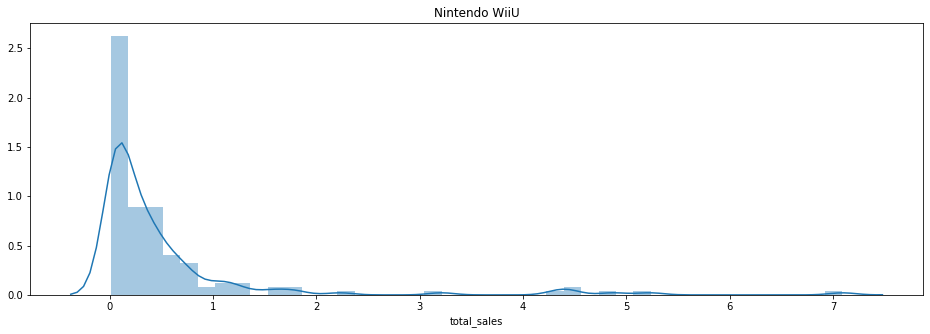

In [35]:
head_tail(df_xone, 'total_sales')
plot_den_outl(df_xone, 'total_sales', 'XOne')
head_tail(df_3ds, 'total_sales')
plot_den_outl(df_3ds, 'total_sales', 'Nintendo 3DS')
# A separate case - the platform WiiU:
head_tail(df_wiiu, 'total_sales')
plot_den_outl(df_wiiu, 'total_sales', 'Nintendo WiiU')

> * Significant difference in numbers between the best-selling game for the PS3 platform (Grand Theft Auto V, total sales: 21.05 thousand dollars) -  and the most unpopular game (for example - NHL 16, total sales: 1 thousand dollars). 
* Special case, PS4 platform: most popular - Call of Duty: Black Ops 3, total sales: 14.63 thousand dollars, and the most unpopular game - Professional Farmer 2016, total sales: 1 thousand dollars.

In [36]:
def scores_display(df, score_1, score_2, score_3, column):    
    #----------------------------------------------------------------------------------
    print('-' *120)
    #print('-'*44 + ' ' + df_title + '' + '-'*50)
    print('-'*34 + ' Description of basic numerical values for two scores: ' + '-'*32)
    print('-' *120)
    display(df[score_1].describe())
    print('-' *120)
    display(df[score_2].describe())
    #----------------------------------------------------------------------------------
    print('-' *120)
    print('-'*44 + ' Graph for combined score: ' + '-'*50)
    print('-' *120)
    # From our project description, we know that: 
    # — Critic_Score (maximum of 100)
    # — User_Score (maximum of 10)
    df[score_3] = (df.loc[:,score_1] + (df.loc[:,score_2] / 10.0)) / 2.0 
    df.plot(x = score_3, y = column, kind = 'scatter', figsize=(16,5))
    plt.show()   
    #----------------------------------------------------------------------------------
    print('-' *120)
    print('-'*44 + ' Percentage of scores: ' + '-'*54)
    print('-' *120)    
    print(score_1 + ' correlation:  ', '{:20.1%}'.format(df[score_1].corr(df[column])))
    print(score_2 + ' correlation:    ', '{:20.1%}'.format(df[score_2].corr(df[column])))
    print(score_3 + ' correlation:', '{:20.1%}'.format(df[score_3].corr(df[column])))
    #----------------------------------------------------------------------------------
    print('-' *120)
    print('-'*45 + ' Heatmap of scores: ' + '-'*55) # need to rewrite this part with formula.
    print('-' *120)   
    critic_corr = df.loc[:,score_1:column]
    plt.subplots(figsize=(16,5))
    sns.heatmap(critic_corr.corr())
    plt.show()

------------------------------------------------------------------------------------------------------------------------
---------------------------------- Description of basic numerical values for two scores: --------------------------------
------------------------------------------------------------------------------------------------------------------------


count    392.000000
mean      70.975702
std       10.115574
min       19.000000
25%       68.967679
50%       68.967679
75%       77.000000
max       97.000000
Name: critic_score, dtype: float64

------------------------------------------------------------------------------------------------------------------------


count    392.000000
mean       6.878013
std        1.194475
min        1.500000
25%        6.600000
50%        7.125046
75%        7.500000
max        9.200000
Name: user_score, dtype: float64

------------------------------------------------------------------------------------------------------------------------
-------------------------------------------- Graph for combined score: --------------------------------------------------
------------------------------------------------------------------------------------------------------------------------


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


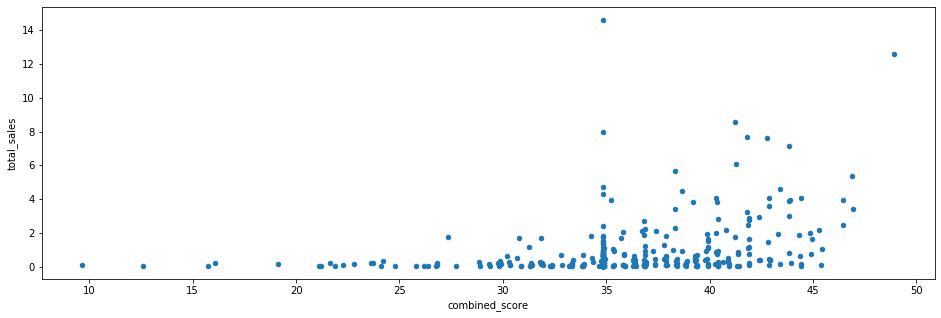

------------------------------------------------------------------------------------------------------------------------
-------------------------------------------- Percentage of scores: ------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------
critic_score correlation:                  34.9%
user_score correlation:                    -4.5%
combined_score correlation:                34.6%
------------------------------------------------------------------------------------------------------------------------
--------------------------------------------- Heatmap of scores: -------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------


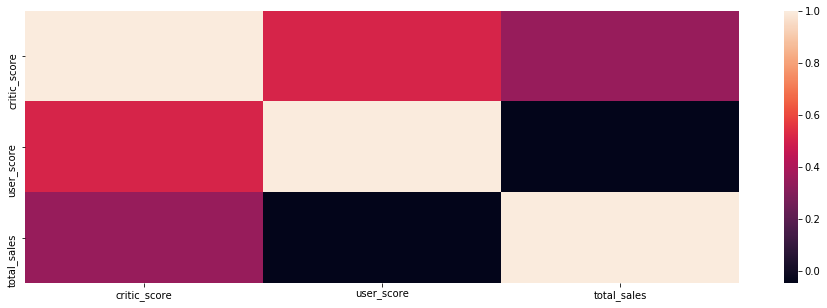

------------------------------------------------------------------------------------------------------------------------
---------------------------------- Description of basic numerical values for two scores: --------------------------------
------------------------------------------------------------------------------------------------------------------------


count    247.000000
mean      71.949307
std       10.895396
min       20.000000
25%       68.967679
50%       68.967679
75%       79.000000
max       97.000000
Name: critic_score, dtype: float64

------------------------------------------------------------------------------------------------------------------------


count    247.000000
mean       6.680275
std        1.214106
min        1.600000
25%        6.100000
50%        7.125046
75%        7.200000
max        9.200000
Name: user_score, dtype: float64

------------------------------------------------------------------------------------------------------------------------
-------------------------------------------- Graph for combined score: --------------------------------------------------
------------------------------------------------------------------------------------------------------------------------


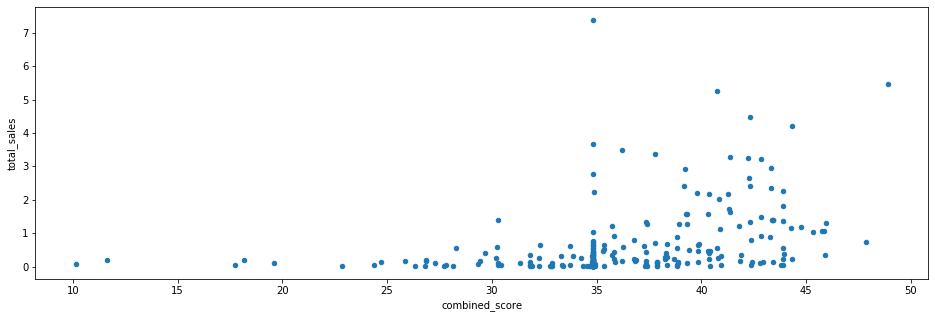

------------------------------------------------------------------------------------------------------------------------
-------------------------------------------- Percentage of scores: ------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------
critic_score correlation:                  37.2%
user_score correlation:                    -9.0%
combined_score correlation:                36.9%
------------------------------------------------------------------------------------------------------------------------
--------------------------------------------- Heatmap of scores: -------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------


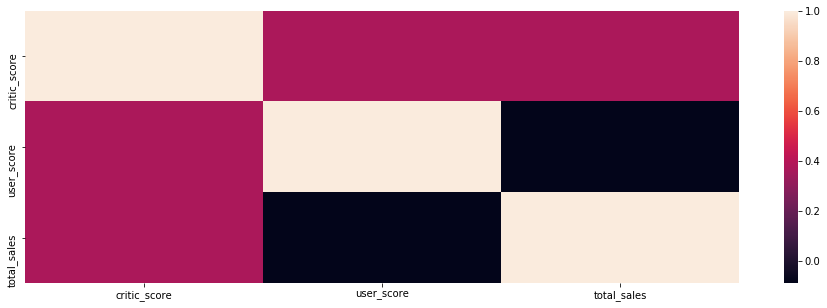

------------------------------------------------------------------------------------------------------------------------
---------------------------------- Description of basic numerical values for two scores: --------------------------------
------------------------------------------------------------------------------------------------------------------------


count    520.000000
mean      68.364659
std        7.102805
min       26.000000
25%       68.967679
50%       68.967679
75%       68.967679
max       92.000000
Name: critic_score, dtype: float64

------------------------------------------------------------------------------------------------------------------------


count    520.000000
mean       7.026858
std        0.834314
min        2.400000
25%        7.125046
50%        7.125046
75%        7.125046
max        9.100000
Name: user_score, dtype: float64

------------------------------------------------------------------------------------------------------------------------
-------------------------------------------- Graph for combined score: --------------------------------------------------
------------------------------------------------------------------------------------------------------------------------


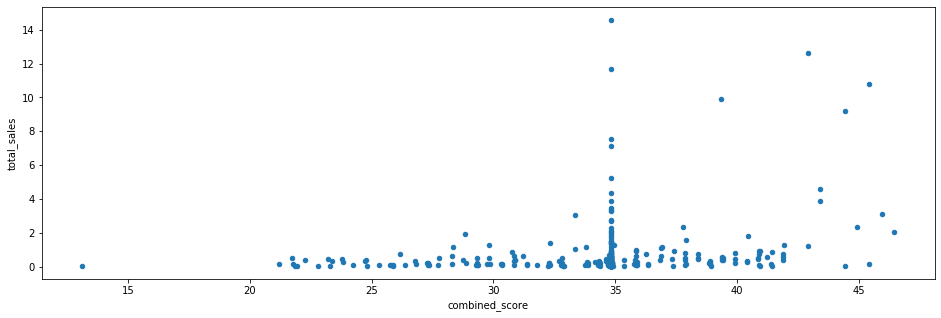

------------------------------------------------------------------------------------------------------------------------
-------------------------------------------- Percentage of scores: ------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------
critic_score correlation:                  21.9%
user_score correlation:                    13.0%
combined_score correlation:                21.9%
------------------------------------------------------------------------------------------------------------------------
--------------------------------------------- Heatmap of scores: -------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------


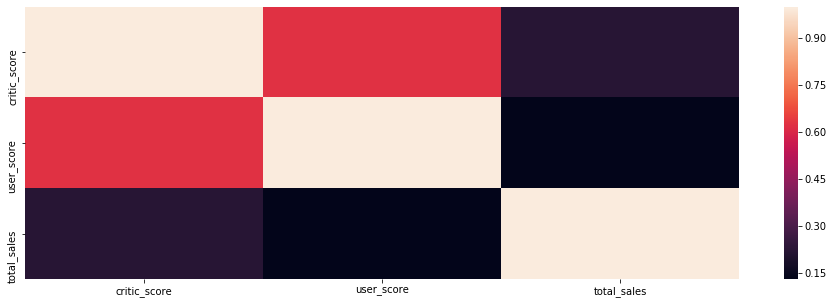

------------------------------------------------------------------------------------------------------------------------
---------------------------------- Description of basic numerical values for two scores: --------------------------------
------------------------------------------------------------------------------------------------------------------------


count    147.000000
mean      70.048692
std       11.501756
min       24.000000
25%       68.967679
50%       68.967679
75%       76.000000
max       93.000000
Name: critic_score, dtype: float64

------------------------------------------------------------------------------------------------------------------------


count    147.000000
mean       6.974675
std        1.186513
min        2.700000
25%        6.800000
50%        7.125046
75%        7.650000
max        9.100000
Name: user_score, dtype: float64

------------------------------------------------------------------------------------------------------------------------
-------------------------------------------- Graph for combined score: --------------------------------------------------
------------------------------------------------------------------------------------------------------------------------


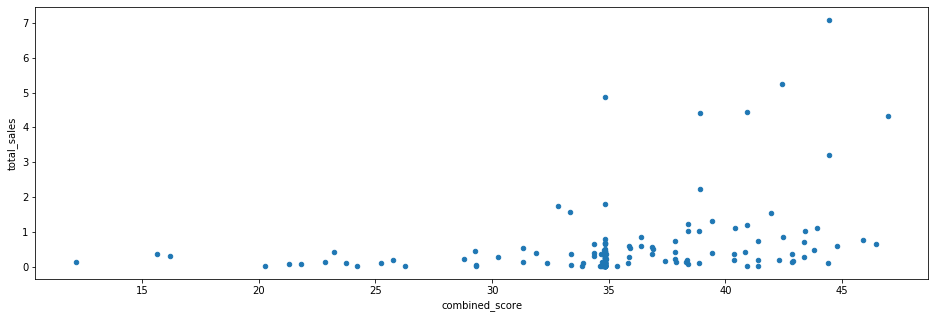

------------------------------------------------------------------------------------------------------------------------
-------------------------------------------- Percentage of scores: ------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------
critic_score correlation:                  32.6%
user_score correlation:                    34.7%
combined_score correlation:                32.7%
------------------------------------------------------------------------------------------------------------------------
--------------------------------------------- Heatmap of scores: -------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------


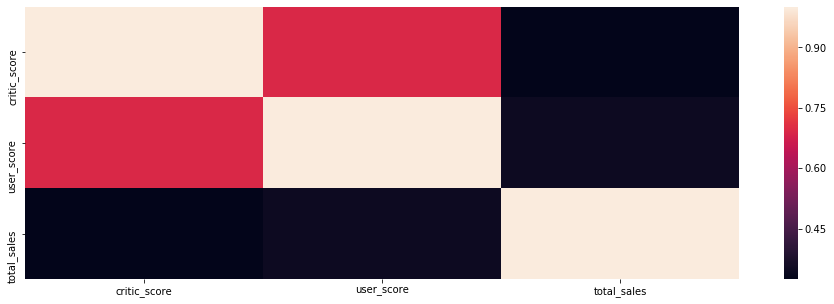

In [37]:
scores_display(df_ps4, 'critic_score', 'user_score', 'combined_score', 'total_sales')
scores_display(df_xone, 'critic_score', 'user_score', 'combined_score', 'total_sales')
scores_display(df_3ds, 'critic_score', 'user_score', 'combined_score', 'total_sales')
scores_display(df_wiiu, 'critic_score', 'user_score', 'combined_score', 'total_sales')

Conclusion:
> * Critics' score have a greater impact on sales than user score. But in general, score do not greatly affect sales, as the percentage does not exceed 38%. The combined assessment shows that the percentage of influence is even lower.

In [38]:
# first need to create list of cross platform games: 
cross_plt_games = set(df_years_slice.groupby(['name']).filter(lambda x: x.shape[0] > 1)['name'])
display(cross_plt_games)

{'2014 FIFA World Cup Brazil',
 '3rd Super Robot Wars Z Jigoku Hen',
 '3rd Super Robot Wars Z: Tengoku-Hen',
 '7 Days to Die',
 'Adventure Time: Finn & Jake Investigations',
 'Adventure Time: The Secret of the Nameless ',
 'Adventure Time: The Secret of the Nameless Kingdom',
 'Aegis of Earth: Protonovus Assault',
 "Agatha Christie's The ABC Murders",
 'Alien: Isolation',
 'Ar Nosurge: Ode to an Unborn Star',
 'Arslan: The Warriors of Legend',
 "Assassin's Creed Chronicles",
 "Assassin's Creed Syndicate",
 "Assassin's Creed The Ezio Collection",
 "Assassin's Creed: Rogue",
 "Assassin's Creed: Unity",
 'Assetto Corsa',
 'Atari Flashback Classics: Volume 1',
 'Atari Flashback Classics: Volume 2',
 'Atelier Firis: The Alchemist of the Mysterious Journey',
 'Atelier Sophie: The Alchemist of the Mysterious Book',
 'Attack on Titan (KOEI)',
 'Back to the Future: The Game',
 'Bakumatsu Rock: Ultra Soul',
 'Barbie and Her Sisters Puppy Rescue',
 'Batman: A Telltale Game Series',
 'Batman: Arkh

In [39]:
df_pop_games = df_years_slice.query('name in @cross_plt_games').groupby(['name', 'platform']).agg({'total_sales' : 'sum'})
df_pop_games.sort_values(by='total_sales', ascending=False, inplace=True)

In [40]:
# total sales more than 6 millions dollars. 
df_pop_games.query('total_sales > 6.0').head(10)

,,total_sales
name,platform,
Call of Duty: Black Ops 3,PS4,14.63
Grand Theft Auto V,PS4,12.62
FIFA 16,PS4,8.58
Star Wars Battlefront (2015),PS4,7.98
Call of Duty: Advanced Warfare,PS4,7.66
FIFA 17,PS4,7.60
Super Smash Bros. for Wii U and 3DS,3DS,7.55
Call of Duty: Black Ops 3,XOne,7.39
Fallout 4,PS4,7.17


> * Conclusion: the most popular games (in terms of sales) are presented for platform Sony Play Station 4. Most popular game "Call of Duty: Black Ops 3" also present at the XOne platform and one specific game "Super Smash Bros. for Wii U and 3DS" for platform 3DS

In [41]:
# take a look first again to dataframe df_years_slices.
df_years_slice.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,68.967679,7.125046,M,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.000000,8.300000,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,68.967679,7.125046,T,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.000000,4.300000,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,68.967679,7.125046,M,7.98


In [42]:
genres = df_years_slice.groupby('genre').agg({'total_sales':'sum'}).sort_values(by='total_sales', ascending=False)
display(genres)

,total_sales
genre,
Action,199.36
Shooter,170.94
Sports,109.48
Role-Playing,101.44
Misc,37.55
Fighting,28.22
Racing,27.52
Platform,18.09
Adventure,17.55


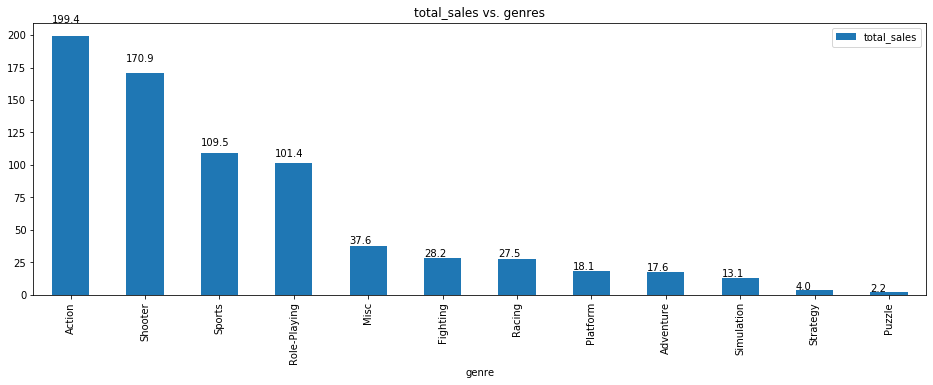

In [43]:
# render above data about genres in plot: 
ax = genres.plot(kind='bar', y='total_sales', title='total_sales vs. genres', figsize=(16,5))
for i in ax.patches: 
    ax.annotate(str(round(i.get_height(), 1)), (i.get_x() * 1, i.get_height() * 1.05))

In [44]:
# double check year_of_release column:
df_years_slice['year_of_release']

31       2015
42       2014
47       2014
77       2015
87       2015
         ... 
16703    2016
16707    2014
16710    2016
16712    2016
16714    2016
Name: year_of_release, Length: 1689, dtype: int64

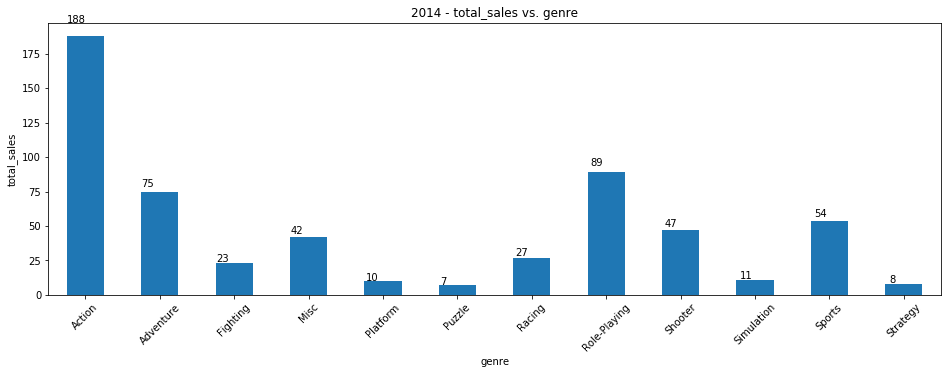

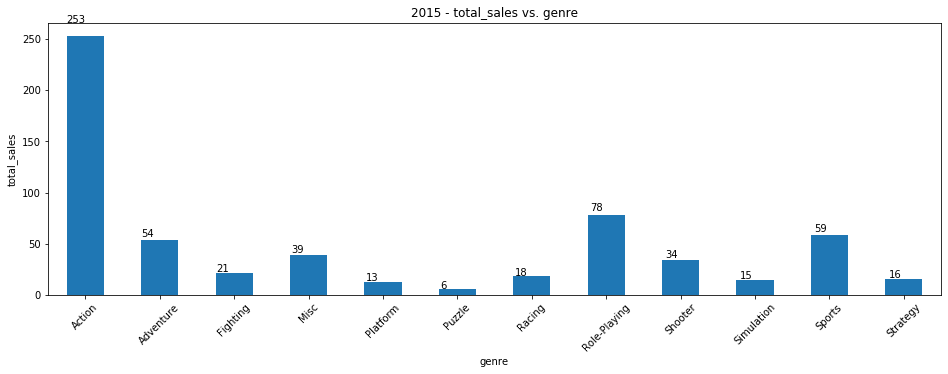

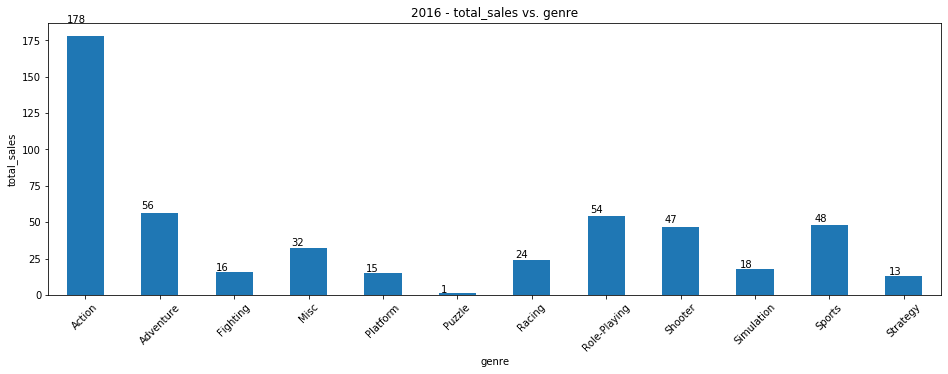

In [45]:
# additional interpretation of data on popular genres starting from 2008.
for year in [2014 + i for i in range(3)]:
    render_plot_bar(df_years_slice, 'genre', 'total_sales', column='year_of_release', value=year, func='count')

> * Conclusion: 
    * The most popular genre of the game is the genre - Action. (Throughout the entire sample for the year, from 2014 to 2016).
    * The second and third places were usually taken by genres - "Role-Playing" and "Adventure", respectively. (Based on data from 2014). The sports genre was ranked fourth.
    * The second and third places in 2015 year were taken by genres - "Role-Playing" and "Sports", respectively. The "Adventure" genre was ranked fourth.
    * For 2016, the current situation is that the first place is again occupied by the Action genre, and the Adventure, Role-Plaiying Games (RPG) and Sports genres occupy the 3rd, 4th and 5th places, respectively.
    * Note: In previous years, the situation was different.

### Step 4. Create User Profile for each region <a name="#Step4UserProfile"></a>

In [46]:
regions = ['na_sales','eu_sales','jp_sales', 'other_sales']

for region in regions:
    print("Region is:", region.title())
    display(df_years_slice.pivot_table(index='platform', values=region, aggfunc='sum').sort_values(by=region, ascending=False).head())
    display(df_years_slice.pivot_table(index='genre', values=region, aggfunc='sum').sort_values(by=region, ascending=False).head())
    display(df_years_slice.pivot_table(index='rating', values=region, aggfunc='sum').sort_values(by=region, ascending=False).head())

Region is: Na_Sales


,na_sales
platform,
PS4,98.61
XOne,81.27
X360,28.30
3DS,22.64
PS3,22.05


,na_sales
genre,
Shooter,79.02
Action,72.53
Sports,46.13
Role-Playing,33.47
Misc,15.05


,na_sales
rating,
M,115.23
T,73.41
E,62.19
E10+,33.23


Region is: Eu_Sales


,eu_sales
platform,
PS4,130.04
XOne,46.25
PS3,25.54
PC,17.97
3DS,16.12


,eu_sales
genre,
Action,74.68
Shooter,65.52
Sports,45.73
Role-Playing,28.17
Racing,14.13


,eu_sales
rating,
M,109.53
E,74.44
T,60.55
E10+,26.16


Region is: Jp_Sales


,jp_sales
platform,
3DS,44.24
PS4,15.02
PSV,14.54
PS3,11.22
WiiU,7.31


,jp_sales
genre,
Role-Playing,31.16
Action,29.58
Fighting,6.37
Misc,5.61
Shooter,4.87


,jp_sales
rating,
T,60.45
E,19.47
M,8.71
E10+,4.46


Region is: Other_Sales


,other_sales
platform,
PS4,44.48
XOne,12.52
PS3,9.37
X360,4.35
3DS,3.68


,other_sales
genre,
Action,22.57
Shooter,21.53
Sports,14.36
Role-Playing,8.64
Misc,4.03


,other_sales
rating,
M,34.25
T,19.81
E,19.73
E10+,7.83


Conclusion:
* In North America (na_sales), most popular platform - PlayStation 4 (PS4). XOne next and 3th place - Microsoft X360.
    * Shooter is the most popular genre; Action and Sports next. Role-Playing games only in 4-th place.
    * M rating is the most popular rating, next followed by T.
* In Europe (eu_sales), also most popular platform - PlayStation 4. 
    * XOne next and 3th place - Sony Play Station 3 (prev.version of Play Station).
    * Action is the most popular than Shooter (compared wih North America). Sports - 3th place. Role-Playing games same like in USA.
    * M rating is the most raiting followed by E.
* In Japan (jp_sales), most popular platform with a very large gap - 3DS.
    * Role-Playing is larger that Action genre in Japan.
    * T - most popular rating in Japan.
* After all, Asian user preferences are very different from North America and Europe. This also applies to platforms and game genres.

### Step 5. Test the following Hypotheses <a name="#Step5Hypotheses"></a>

**Null Hypotheses: The average user ratings of the Xbox One and PC platforms are the same:**
> * Condition for check: (XboxOne_rating_mean) == (PC_rating_mean)

**Alternative Hypotheses: The average user ratings of the Xbox One and PC platforms are not the same:**
> * Condition for check: (XboxOne_rating_mean) != (PC_rating_mean)

In [47]:
xbox_one_user = df_years_slice.query('platform == "XOne"')['user_score']
pc_user       = df_years_slice.query('platform == "PC"')['user_score']

print('Xbox One platform mean value:', xbox_one_user.mean())
print('PC platform mean value:',pc_user.mean())

Xbox One platform mean value: 6.741131162887455
PC platform mean value: 6.457128061496042


In [48]:
# define function for check hypotheses:
def test_hypotheses(pattern_1, pattern_2):
    alpha   = .05
    results = st.ttest_ind(pattern_1, pattern_2)

    print('pvalue:', results.pvalue)
    print('alpha:', alpha)
    if results.pvalue < alpha:
        print('Decision: We reject the null hypotheses')
    else:
        print('Decision: We cannot reject the null hypotheses')

In [49]:
test_hypotheses(xbox_one_user, pc_user)

pvalue: 0.04613090805961041
alpha: 0.05
Decision: We reject the null hypotheses


> * The mean user_score for the these two platforms are very similar to each other. By using the ttest, we can confirm that we cannot to reject the null hypotheses.

**Null Hypotheses: Average user ratings for the Action and Sports genres are equal :**
> * Condition for check: (action_mean) == (sports_mean)

**Alternative Hypotheses: Average user ratings for the Action and Sports genres are not equal:**
> * Condition for check: (action_mean) != (sports_mean)

In [50]:
action_user = df_years_slice.query('genre == "Action"')['user_score']
sports_user = df_years_slice.query('genre == "Sports"')['user_score']

print('Action genre mean value:', action_user.mean())
print('Sports genre mean value:', sports_user.mean())

Action genre mean value: 6.950185538747734
Sports genre mean value: 5.626407253741847


In [51]:
test_hypotheses(action_user, sports_user)

pvalue: 7.780528659006889e-33
alpha: 0.05
Decision: We reject the null hypotheses


> * Based on the fact that the Null hypothesis was **REJECTED**, it can be **CONFERMED** that the alternative hypothesis that "the average user ratings for the Action and Sports genres are not equal - **DIFFERENT**."

### Step 6. Write general conclusion <a name="GeneralConclusion"></a>

> * There are many missing values in the initial project datasets. Largest percentage of missing values in critics, user scores, and ratings. I believe that the main reason is that some do not rate them as this is not the main reason for them to buy the game. Only the best or worst games can be judged from the users' point of view. The reason for the presence of a large number of missing values among the critics is not clear to me. It is worth taking the time to find out this reason.
> * After about 1 year, the console will gain popularity. Typical lifespan of concolse is around 4-6 years.
> * The most popular genre of the game is the genre - Action. (Throughout the entire sample for the year, from 2008 to 2016).
The second and third places were usually taken by genres - "Misc" and "Sports", respectively. (Based on data from 2008 to 2011.) 
> * North America:  most popular platform - PlayStation 4 (PS4). XOne next and 3th place - Microsoft X360. Shooter is the most popular genre; Action and Sports next. Role-Playing games only in 4-th place.
> * In Europe: most popular platform - PlayStation 4. Action is the most popular than Shooter (compared wih North America). Sports - 3th place. Role-Playing games same like in USA. M rating is the most raiting followed by E.
XOne next and 3th place - Sony Play Station 3 (prev.version of Play Station).
> * In Japan: Asian user preferences are very different from North America and Europe. This also applies to platforms and game genres. Most popular platform with a very large gap - 3DS. Role-Playing is larger that Action genre in Japan. T - most popular rating in Japan.

**Suggestions:**
> * Ice company should pay attention to sales of the game on the Sony PlayStation (version 4 and 3) and Xone platforms in North America and Europe. Also, taking into account the geographic specifics. This is very important, since, for example, in Japan, in contrast to America and Europe, the genre of role-playing games is not very popular. Separately, it should be noted that the most popular platform in Japan is 3DS platform.
> * Сoncentrate on the genre of sales - Shooter, Action, Sports and Role-playing games. Since it is December 2016, many purchases will be made as gifts for Christmas and New Years, in North America and Europe. Perhaps an additional introduction of a discotheque system and gift certificates for the purchase of games. 
> * Additionally, you can advise the introduction of various monthly subscriptions, which can keep the flow of money from users. At the moment, the market for released platforms is becoming more and more conservative and includes 4-5 popular platforms.
> * Additionally, you can make a promotion for games for old platforms, for those who still have old platforms.